## Lesson 5: LSTM for Time Series Forecasting
* Expected shape `[samples, timesteps, features]`

In [52]:
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sliding window from lesson 2
def sliding_window(li, step):
    import numpy as np
    idx = [(i, i+step) for i in range(0, len(li)-step)]
    X = []
    y = []
    for i, j in idx:
        X.append(li[i:j])
        y.append(li[j])
    return np.array(X), np.array(y)

# read data
df = pd.read_csv('data/daily-total-female-births.csv')
s = df.sort_values('Date')['Births'].values

window_size = 7
epochs = 100

# sliding window
X, y = sliding_window(s, window_size)
X = X.reshape(X.shape[0], X.shape[1], 1)

# split into train, test
sep = int(len(X) * 1/2)
train_X, train_y = X[:sep], y[:sep]
test_X, test_y = X[sep:], y[sep:]

In [53]:
# define model
model = Sequential()
model.add(
    LSTM(20, activation='relu', input_shape=(window_size, 1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(train_X, train_y, epochs=epochs, verbose=0)

# demonstrate prediction
pred_y = model.predict(test_X)
mean_squared_error(test_y, pred_y)

49.685940032911695

### Predict Test Data
* Can be seen in the plot that the model is able to predict the trend of total female births

MSE: 49.685940032911695


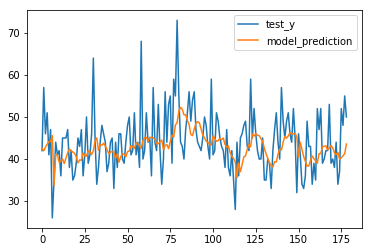

In [54]:
# demonstrate prediction
pred_y = model.predict(test_X)
print('MSE:', mean_squared_error(test_y, pred_y))

# plot test_y, pred_y
plt.plot(test_y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['test_y', 'model_prediction'])
plt.show()

### Fit whole data
* This is plot on predicting the whole dataset (training + testing)
* The model is able to predict the data

MSE: 50.23578715805217


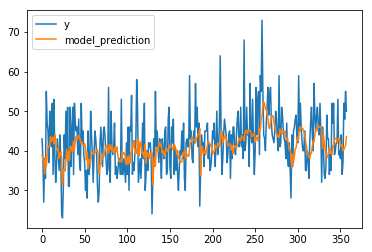

In [55]:
# demonstrate prediction
pred_y = model.predict(X)
print('MSE:', mean_squared_error(y, pred_y))

# plot test_y, pred_y
plt.plot(y.reshape(-1,1))
plt.plot(pred_y)
plt.legend(['y', 'model_prediction'])
plt.show()
